# Analysis

### Observed Trend 1: Tweets 


### Observed Trend 2: CBS and Fox had the most positive tweets then BBC and CNN and NYTimes have negative tweets

### Observed Trend 3: We can see a lots of neutral tweets


In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#  API key
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Get all tweets from home feed
target_tags = ["BBC", "CBS", "CNN", "FOX", "NYTimes"]

media = []
dates = []
# Variables for holding sentiments
compound = []
positive = []
negative = []
neutral = []

# Loop through each hashtag
for tag in target_tags:
    
    public_tweets = api.user_timeline(tag, count=100)
    
    for tweet in public_tweets:
  
        results = analyzer.polarity_scores(tweet['text'])
        media.append(tag)
        dates.append(tweet["created_at"])
        compound.append(results["compound"])
        positive.append(results["pos"])
        negative.append(results["neg"])
        neutral.append(results["neu"])

tweet_dict = {
  "Media": media,
  "Compound": compound,
  "Positive": positive,
  "Negative": negative,
  "Neutral": neutral,
  "Tweet_date": dates 
  }

tweet_data = pd.DataFrame(tweet_dict)       
tweet_data

,Compound,Media,Negative,Neutral,Positive,Tweet_date
0,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 21:20:15 +0000 2018
1,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 19:05:08 +0000 2018
2,0.2960,BBC,0.074,0.792,0.134,Tue Jun 26 18:03:06 +0000 2018
3,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 17:02:02 +0000 2018
4,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 16:33:41 +0000 2018
5,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 16:00:15 +0000 2018
6,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 14:52:03 +0000 2018
7,0.8360,BBC,0.000,0.683,0.317,Tue Jun 26 14:32:33 +0000 2018
8,0.6114,BBC,0.000,0.818,0.182,Tue Jun 26 13:12:16 +0000 2018
9,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 12:58:04 +0000 2018


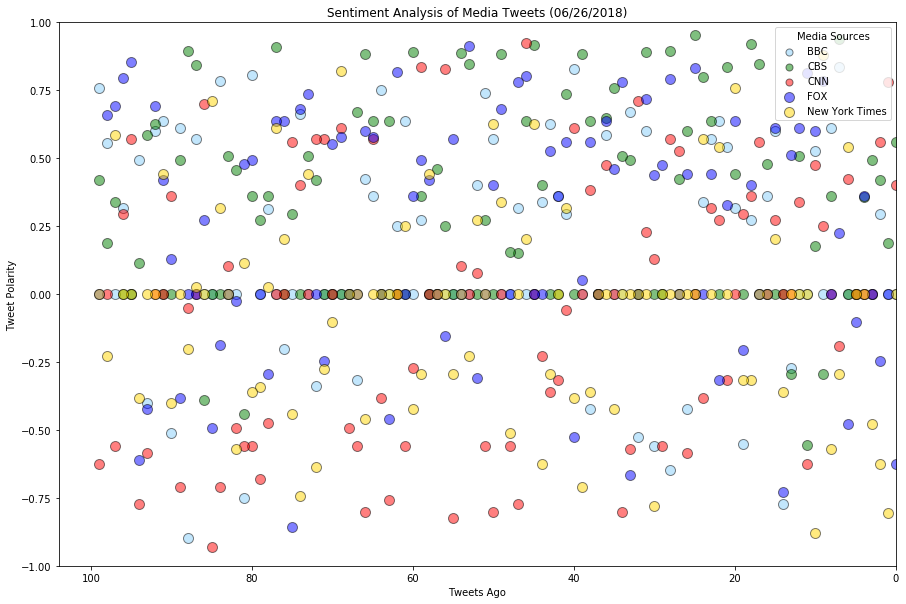

In [3]:
# Defining the X and Y: 
bbc_compound = tweet_data.loc[tweet_data['Media'] == "BBC"]
cbs_compound = tweet_data.loc[tweet_data['Media'] == "CBS"]
cnn_compound = tweet_data.loc[tweet_data['Media'] == "CNN"]
fox_compound = tweet_data.loc[tweet_data['Media'] == "FOX"]
newYorkTimes_compound = tweet_data.loc[tweet_data['Media'] == "NYTimes"]

# Build bubble plots:
plt.figure(figsize= (15,10))
plt.scatter(bbc_compound.index, bbc_compound['Compound'], color="lightskyblue", edgecolor="black"
            , label="BBC", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cbs_compound.index-100, cbs_compound['Compound'], color="Green", edgecolor="black"
            , label="CBS", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cnn_compound.index-200, cnn_compound['Compound'], color="Red", edgecolor="black"
            , label="CNN", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(fox_compound.index-300, fox_compound['Compound'], color="Blue", edgecolor="black"
            , label="FOX", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(newYorkTimes_compound.index-400, newYorkTimes_compound['Compound'], color="gold", edgecolor="black"
            , label="New York Times", alpha=0.5, s=round(100, 0), linewidths=1)


plt.title("Sentiment Analysis of Media Tweets (06/26/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim ([bbc_compound.index.max()+5, bbc_compound.index.min()])
plt.ylim (-1.0,1.0)

lgnd=plt.legend(loc="upper right", title="Media Sources", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]

plt.savefig("output_10_1.png")
plt.show()

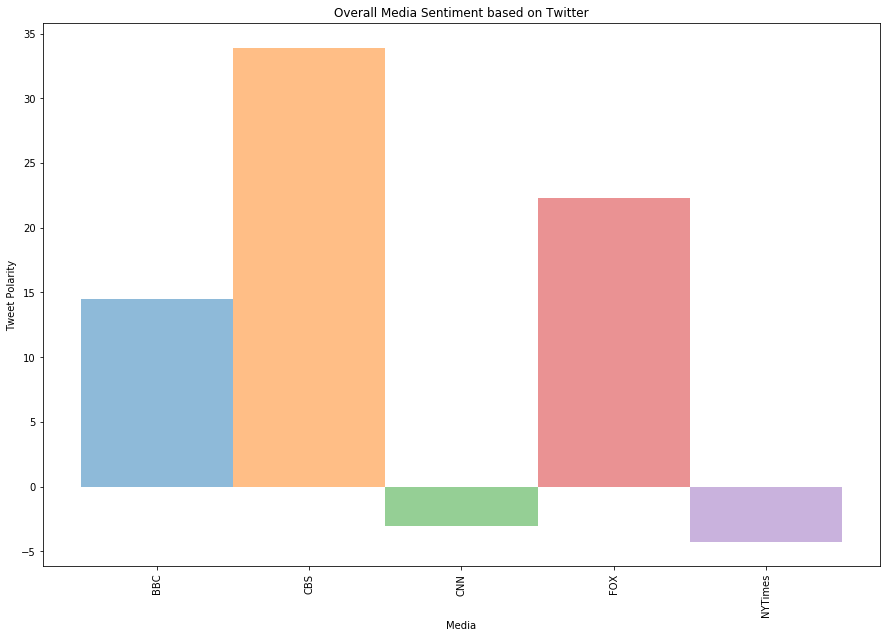

In [4]:
compound_sum = tweet_data.groupby('Media')['Compound'].sum()
plt.figure(figsize= (15,10))
sentiment_chart = compound_sum.plot(kind="bar", title="Overall Media Sentiment based on Twitter", width=1, alpha=0.5)

#for y in sentiment_chart:
    #y_value = rect.get_height()

plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")
plt.savefig("output_13_1.png")
plt.show()